In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# Import the link for sqlalchemy
from db_key import link

# Initialize and setup sqlalchemy to read from SQL Database
from sqlalchemy import create_engine
engine = create_engine(link)
connection = engine.connect()

In [2]:
# Use the pandas read_sql_table function to read in the View created in postgres and display the newly created dataframe
table_df = pd.read_sql_table('company_employee_data',connection)
table_df

,employee_number,title,birth_date,first_name,last_name,sex,hire_date,department_name,department_number,salary
0,10005,Staff,1955-01-21,Kyoichi,Maliniak,M,1989-09-12,Human Resources,d003,78228
1,10010,Engineer,1963-06-01,Duangkaew,Piveteau,F,1989-08-24,Production,d004,72488
2,10010,Engineer,1963-06-01,Duangkaew,Piveteau,F,1989-08-24,Quality Management,d006,72488
3,10011,Staff,1953-11-07,Mary,Sluis,F,1990-01-22,Customer Service,d009,42365
4,10013,Senior Staff,1963-06-07,Eberhardt,Terkki,M,1985-10-20,Human Resources,d003,40000
...,...,...,...,...,...,...,...,...,...,...
331598,499948,Engineer,1953-05-24,Cordelia,Paludetto,M,1993-01-28,Production,d004,40000
331599,499972,Senior Engineer,1957-07-25,Katsuo,Leuchs,F,1989-11-23,Development,d005,41002
331600,499985,Staff,1964-12-26,Gila,Lukaszewicz,M,1997-02-11,Research,d008,40000
331601,499987,Staff,1961-09-05,Rimli,Dusink,F,1998-09-20,Sales,d007,52282


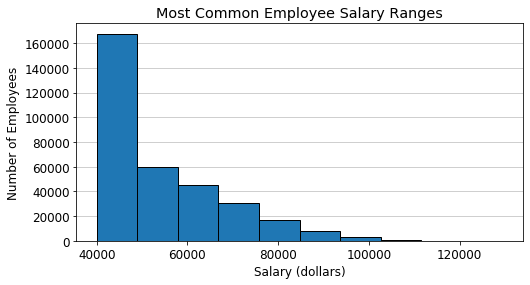

In [3]:
# Create a histogram of the salary field
plt.figure(figsize=(8,4))

# Change the font size and set the grid to appear behind the chart
plt.rcParams.update({'font.size': 12, 'axes.axisbelow':True})
plt.grid(axis='y', alpha=0.75)
plt.hist(table_df["salary"], edgecolor='black')
plt.title("Most Common Employee Salary Ranges")
plt.ylabel("Number of Employees")
plt.xlabel("Salary (dollars)");

In [4]:
# Group the data by title and calculate the average to get average salary by title
title_group = table_df.groupby("title").mean()

# Reset the index so we can use the title column
title_salary_df =  title_group.reset_index()

# Display the data frame
title_salary_df

,title,employee_number,salary
0,Assistant Engineer,254103.701757,48615.074794
1,Engineer,253524.102625,48533.339845
2,Manager,110780.833333,51531.041667
3,Senior Engineer,253126.972571,48505.714313
4,Senior Staff,254320.012266,58557.394072
5,Staff,253351.855077,58460.049489
6,Technique Leader,252100.485472,48574.320997


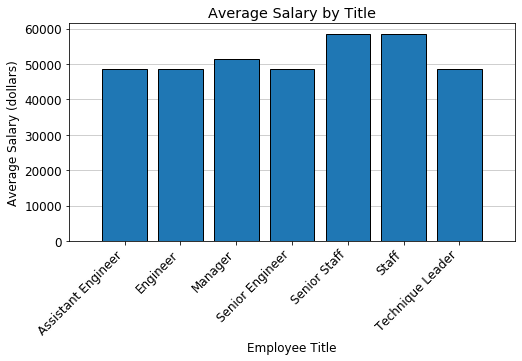

In [5]:
# Create lists of the title and average salaries
title = title_salary_df["title"].to_list()
avg_salary = title_salary_df["salary"].to_list()

# Create a bar plot with the employee titles and average salaries
plt.figure(figsize=(8,4))
plt.rcParams.update({'font.size': 12, 'axes.axisbelow':True})
plt.grid(axis='y', alpha=0.75)
plt.bar(title, avg_salary, edgecolor='black')
plt.title("Average Salary by Title")
plt.ylabel("Average Salary (dollars)")

plt.xticks(rotation=45, ha='right')
plt.xlim(-1, len(title))
plt.xlabel("Employee Title");

# Conclusion

Based on the histogram, we can see that there are an abnormal amount of people in the $40,000.00 salary range. Looking further at the bar chart of average salaries by title, we can conclude that this must be fictitious data as Staff and Senior Staff are earning nearly the same amount on average and they are both earning more than the engineers working at the company. It also appears as though different levels of seniority within the engineering teams are all being paid the same on average, which also seems leads to the conclusion that this data has been created under false pretenses.